# Libraries Import

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [75]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

# Dataset Import

In [76]:
df = pd.read_csv(r"healthcare_diabetes.csv")

# Dataset Exploration

In [77]:
list(df.columns)

['PatientID',
 'Age',
 'Gender',
 'BMI',
 'BloodPressure',
 'GlucoseLevel',
 'PhysicalActivity',
 'FamilyHistory',
 'Diabetes']

In [78]:
pd.concat([df.head(5), df.sample(5), df.tail(5)])

PatientID  Age  Gender   BMI  BloodPressure  GlucoseLevel  \
0    58ad267f   56  Female  30.5            109         192.0   
1    6c7081ea   69    Male  26.3            118         188.0   
2    2a46a9fb   46  Female  26.6            110         187.0   
3    b726744a   32    Male  25.6             81          90.0   
4    a0c44913   60    Male  28.5            157          95.0   
222  bcb48db8   23    Male  21.7             82          90.0   
474  a89f02be   63    Male  22.8             97         150.0   
74   d6229fa7   64    Male  26.5            135          77.0   
42   ef4e863f   77  Female  31.4            155         171.0   
156  7aa2525d   25  Female  26.3            112         112.0   
505  c5d462bf   57  Female   NaN            152           NaN   
506  981e29bc   52    Male   NaN             98           NaN   
507  5c382b51   77    Male   NaN             88           NaN   
508  969599ac   26    Male   NaN            126           NaN   
509  0df66cdd   50    Male   NaN            159           NaN   

    PhysicalActivity FamilyHistory  Diabetes  
0               High            No         1  
1             Medium           Yes         1  
2               High           Yes         1  
3             Medium           Yes         0  
4               High            No         0  
222             High           Yes         0  
474              Low           Yes         1  
74            Medium           Yes         0  
42              High           Yes         1  
156              Low            No         0  
505           Medium            No         0  
506              Low           Yes         1  
507              Low            No         1  
508              Low           Yes         0  
509           Medium            No         1

In [ ]:
df.describe()

Age         BMI  BloodPressure  GlucoseLevel    Diabetes
count  510.000000  475.000000     510.000000    475.000000  510.000000
mean    49.964706   26.722947     119.786275    134.997895    0.601961
std     18.206055    5.118280      23.715807     38.999540    0.489974
min     18.000000    9.600000      80.000000     71.000000    0.000000
25%     35.000000   23.400000      99.000000    100.000000    0.000000
50%     50.000000   26.800000     119.000000    136.000000    1.000000
75%     66.000000   30.250000     141.000000    170.000000    1.000000
max     79.000000   40.900000     159.000000    199.000000    1.000000

Age         BMI  BloodPressure  GlucoseLevel    Diabetes
count  510.000000  475.000000     510.000000    475.000000  510.000000
mean    49.964706   26.722947     119.786275    134.997895    0.601961
std     18.206055    5.118280      23.715807     38.999540    0.489974
min     18.000000    9.600000      80.000000     71.000000    0.000000
25%     35.000000   23.400000      99.000000    100.000000    0.000000
50%     50.000000   26.800000     119.000000    136.000000    1.000000
75%     66.000000   30.250000     141.000000    170.000000    1.000000
max     79.000000   40.900000     159.000000    199.000000    1.000000

In [ ]:
df.describe(include='object')

PatientID  Gender PhysicalActivity FamilyHistory
count        510     510              510           510
unique       500       2                3             2
top     5c382b51  Female              Low           Yes
freq           2     255              179           267

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         510 non-null    object 
 1   Age               510 non-null    int64  
 2   Gender            510 non-null    object 
 3   BMI               475 non-null    float64
 4   BloodPressure     510 non-null    int64  
 5   GlucoseLevel      475 non-null    float64
 6   PhysicalActivity  510 non-null    object 
 7   FamilyHistory     510 non-null    object 
 8   Diabetes          510 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 36.0+ KB


# Dataset Preprocessing

unique values

In [ ]:
pd.DataFrame([ df.nunique(), df.dtypes ], index=['Unique Values', 'Data Types'])

PatientID    Age  Gender      BMI BloodPressure GlucoseLevel  \
Unique Values       500     62       2      190            80          128   
Data Types       object  int64  object  float64         int64      float64   

              PhysicalActivity FamilyHistory Diabetes  
Unique Values                3             2        2  
Data Types              object        object    int64

features type

In [ ]:
TARGET = 'Diabetes'
INPUT_FEATURES = ['PatientID', 'Age', 'Gender', 'BMI', 'BloodPressure', 'GlucoseLevel', 'PhysicalActivity', 'FamilyHistory']
CATEGORICAL_FEATURES =  ['PatientID', 'Gender', 'PhysicalActivity', 'FamilyHistory']
NUMERICAL_FEATURES = ['Age', 'BMI', 'BloodPressure', 'GlucoseLevel']

In [ ]:
df[CATEGORICAL_FEATURES] = df[CATEGORICAL_FEATURES].astype(str)
df[NUMERICAL_FEATURES] = df[NUMERICAL_FEATURES].astype(float)
df[TARGET] = df[TARGET].astype(int)

In [ ]:
pd.DataFrame([ df.nunique(), df.dtypes ])

PatientID      Age  Gender      BMI BloodPressure GlucoseLevel  \
0       500       62       2      190            80          128   
1    object  float64  object  float64       float64      float64   

  PhysicalActivity FamilyHistory Diabetes  
0                3             2        2  
1           object        object    int64

Duplicates

In [ ]:
df.duplicated().sum()

np.int64(10)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

null values

In [ ]:
pd.DataFrame(
    {
    "Count" : df.isna().sum().sort_values(ascending=False),
    "percent %" : 100.0 * (df.isna().sum().sort_values(ascending=False) )/ len(df),
    }
).T

BMI  GlucoseLevel  PatientID  Gender  Age  BloodPressure  \
Count      25.0          25.0        0.0     0.0  0.0            0.0   
percent %   5.0           5.0        0.0     0.0  0.0            0.0   

           PhysicalActivity  FamilyHistory  Diabetes  
Count                   0.0            0.0       0.0  
percent %               0.0            0.0       0.0

In [ ]:
#بما ان المفقود بسيط 
df=df.fillna(df.median(numeric_only=True))

In [ ]:
pd.DataFrame(
    {
    "Count" : df.isna().sum().sort_values(ascending=False),
    "percent %" : 100.0 * df.isna().sum().sort_values(ascending=False) / len(df),
    }
).T

PatientID  Age  Gender  BMI  BloodPressure  GlucoseLevel  \
Count            0.0  0.0     0.0  0.0            0.0           0.0   
percent %        0.0  0.0     0.0  0.0            0.0           0.0   

           PhysicalActivity  FamilyHistory  Diabetes  
Count                   0.0            0.0       0.0  
percent %               0.0            0.0       0.0

Drop Unwanted Features

In [ ]:
def drop_unnwanted_features(df, features_to_drop):
    print(f"Dropping features: {features_to_drop}")

    if features_to_drop in list(df.columns):
        df = df.drop(columns=features_to_drop)

    if features_to_drop in INPUT_FEATURES:
        INPUT_FEATURES.remove(features_to_drop)

    if features_to_drop in CATEGORICAL_FEATURES:
        CATEGORICAL_FEATURES.remove(features_to_drop)

    if features_to_drop in NUMERICAL_FEATURES:
        NUMERICAL_FEATURES.remove(features_to_drop)
        
    return df
#ليه دا كلو؟
#عشان لازم اشيله من ال dataa و من اي list of columns عشان لو استعملتها تحت


In [ ]:
df = drop_unnwanted_features(df, 'PatientID')

Dropping features: PatientID


# EDA & Dataset Visualization

Distribuation

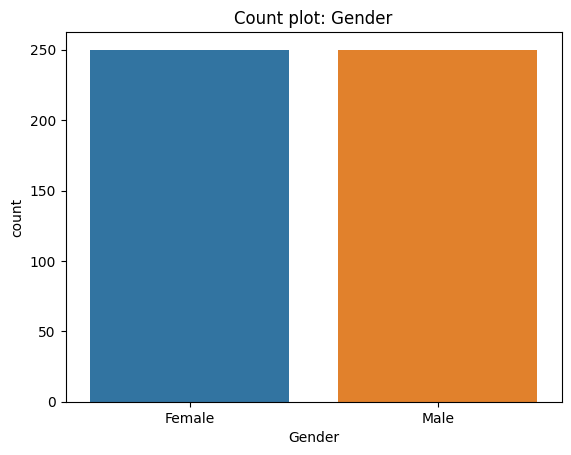

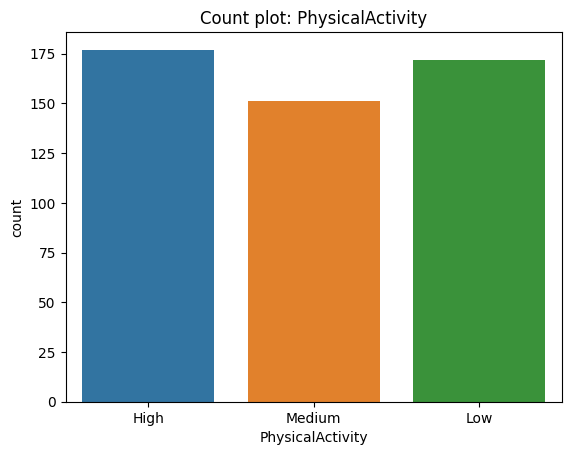

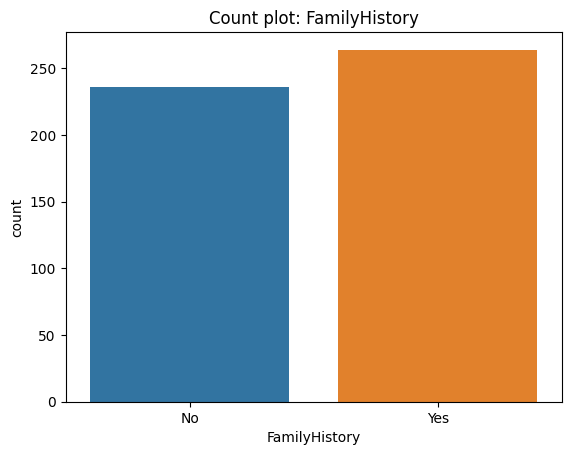

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in CATEGORICAL_FEATURES:
    sns.countplot(data=df, x=col, hue=col, legend=False)
    plt.title(f"Count plot: {col}")
    plt.show()


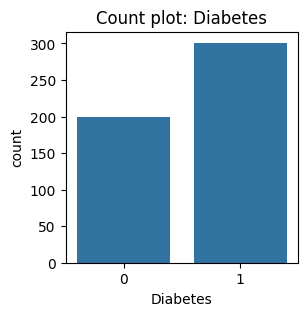

In [ ]:
plt.figure(figsize=(3,3))
plt.title(f"Count plot: {TARGET}")
sns.countplot(df, x=TARGET)
plt.show()

* There are bias in target column , not balanced

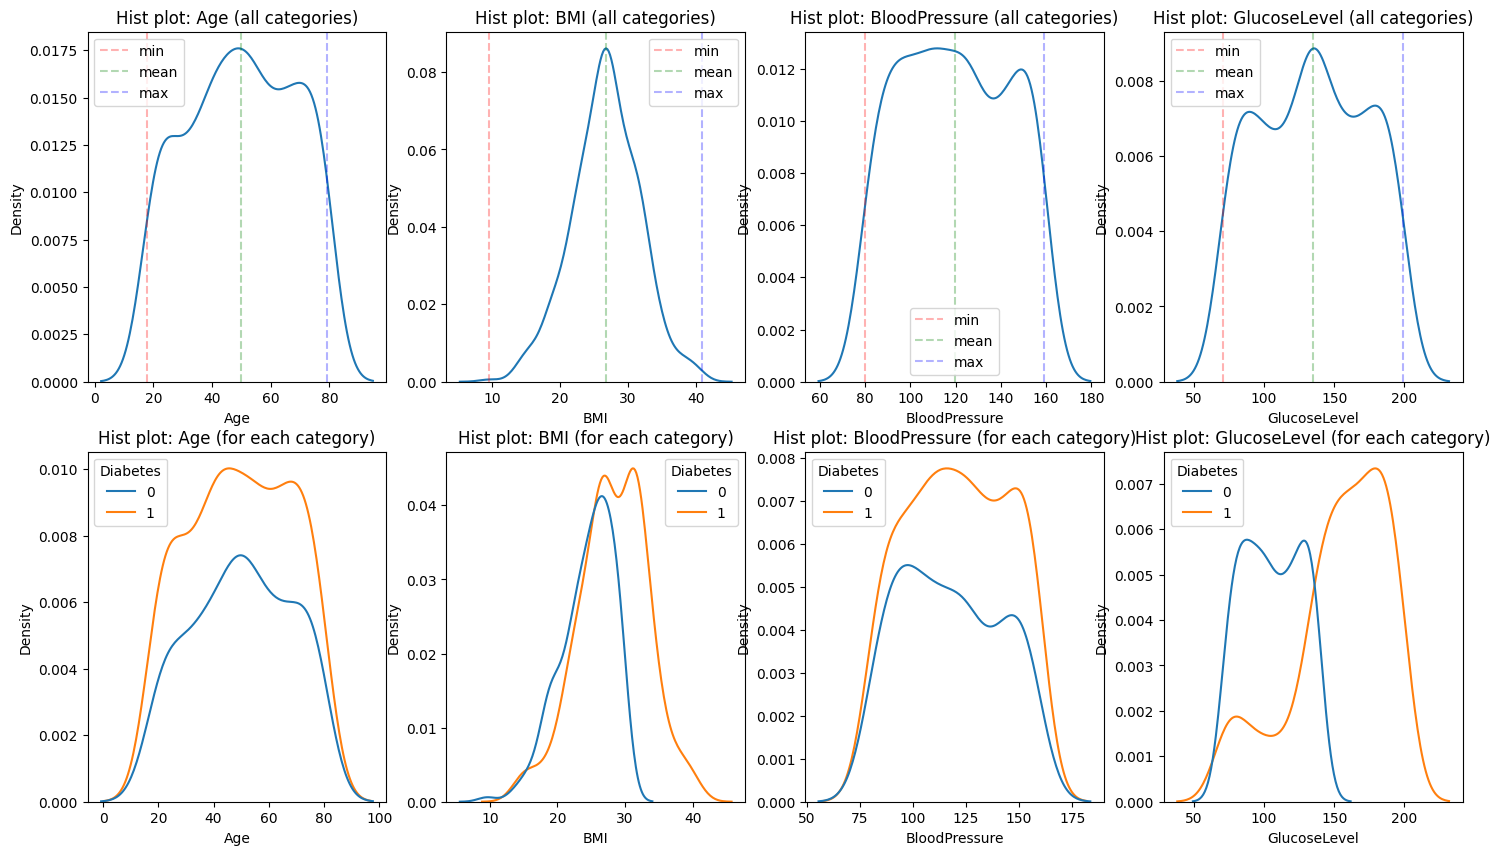

In [ ]:
ROW_WIDTH = 6
temp = 0

for num_feature in NUMERICAL_FEATURES:
    if temp == 0:
        plt.figure(figsize=(27,10))

    plt.subplot(2,ROW_WIDTH, temp + 1)
    plt.title(f"Hist plot: {num_feature} (all categories)")
    sns.kdeplot(df, x=num_feature, )
    
    plt.axvline(x= df[num_feature].min() , label="min", color='r', linestyle='--', alpha = 0.3)
    plt.axvline(x= df[num_feature].mean() , label="mean", color='g', linestyle='--', alpha = 0.3)
    plt.axvline(x= df[num_feature].max() , label="max", color='b', linestyle='--', alpha = 0.3)

    plt.legend()


    plt.subplot(2,ROW_WIDTH, (temp + 1) + ROW_WIDTH)
    plt.title(f"Hist plot: {num_feature} (for each category)")
    sns.kdeplot(df, x=num_feature, hue=TARGET, palette='tab10')
    
    if temp == ROW_WIDTH - 1:
        plt.show()

    temp = (temp + 1) % ROW_WIDTH

if temp != ROW_WIDTH - 1:
    plt.show()

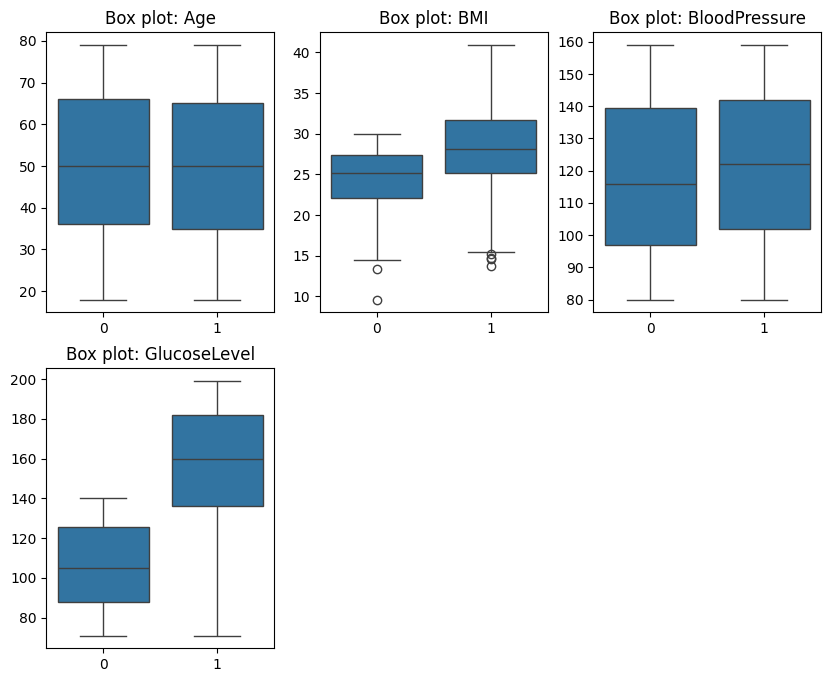

In [ ]:
N_COLS = 3
N_ROWS = math.ceil(len(NUMERICAL_FEATURES) / N_COLS)

plt.figure(figsize=(10,8))

for i, feature in enumerate(NUMERICAL_FEATURES):
    plt.subplot(N_ROWS, N_COLS, i+1)
    plt.title(f"Box plot: {feature}")
    sns.boxplot(df, x=TARGET, y=feature)
    plt.ylabel("")
    plt.xlabel('')

plt.show()

# Outliers

In [ ]:
def IQR(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    
    IQR = Q3 - Q1

    min_v = Q1 - 1.5 * IQR
    max_v = Q3 + 1.5 * IQR

    return series.clip(lower=min_v, upper=max_v)


In [ ]:

for num_feature in NUMERICAL_FEATURES:
    for gender_category in set(df[TARGET].values):
        mask = df[TARGET] == gender_category
        df.loc[mask, num_feature] = IQR(df.loc[mask, num_feature])

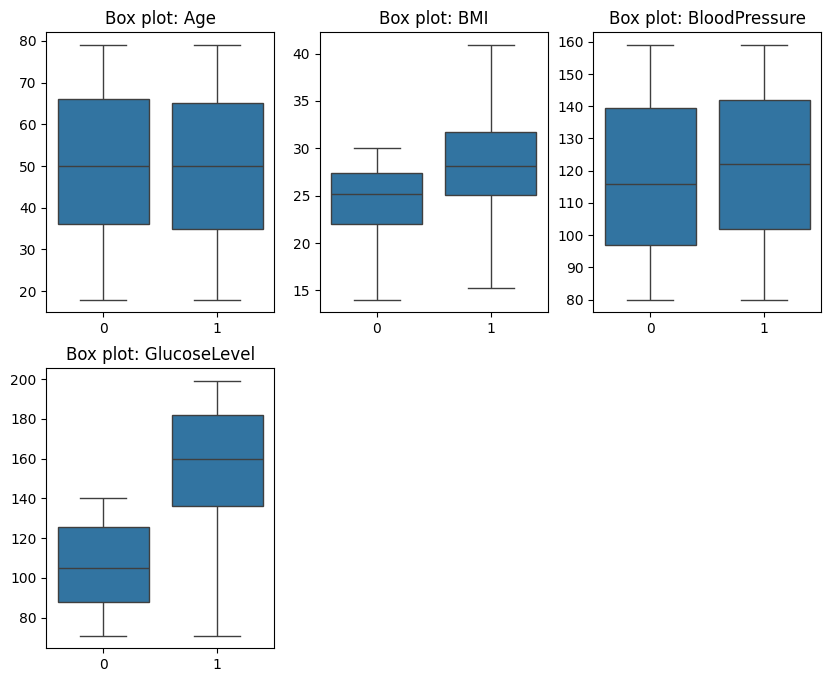

In [ ]:
N_COLS = 3
N_ROWS = math.ceil(len(NUMERICAL_FEATURES) / N_COLS)

plt.figure(figsize=(10,8))

for i, feature in enumerate(NUMERICAL_FEATURES):
    plt.subplot(N_ROWS, N_COLS, i+1)
    plt.title(f"Box plot: {feature}")
    sns.boxplot(df, x=TARGET, y=feature)
    plt.ylabel("")
    plt.xlabel('')

plt.show()

# Feauter Engineering

In [ ]:
INPUT_FEATURES

['Age',
 'Gender',
 'BMI',
 'BloodPressure',
 'GlucoseLevel',
 'PhysicalActivity',
 'FamilyHistory']

In [ ]:

df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
INPUT_FEATURES.append('BMI_Category')
CATEGORICAL_FEATURES.append('BMI_Category')


In [ ]:
#بيقيس التفاعل بين الخاصيتين
df['BMI_Glucose_Interaction'] = df['BMI'] * df['GlucoseLevel']
NUMERICAL_FEATURES.append('BMI_Glucose_Interaction')
INPUT_FEATURES.append('BMI_Glucose_Interaction')

In [ ]:

# Binary feature: High Blood Pressure
df['High_BP'] = (df['BloodPressure'] > 130).astype(int)
NUMERICAL_FEATURES.append('High_BP')
INPUT_FEATURES.append('High_BP')

# Correlation Matrix

<Axes: title={'center': 'Input Features Correlation with Target'}>

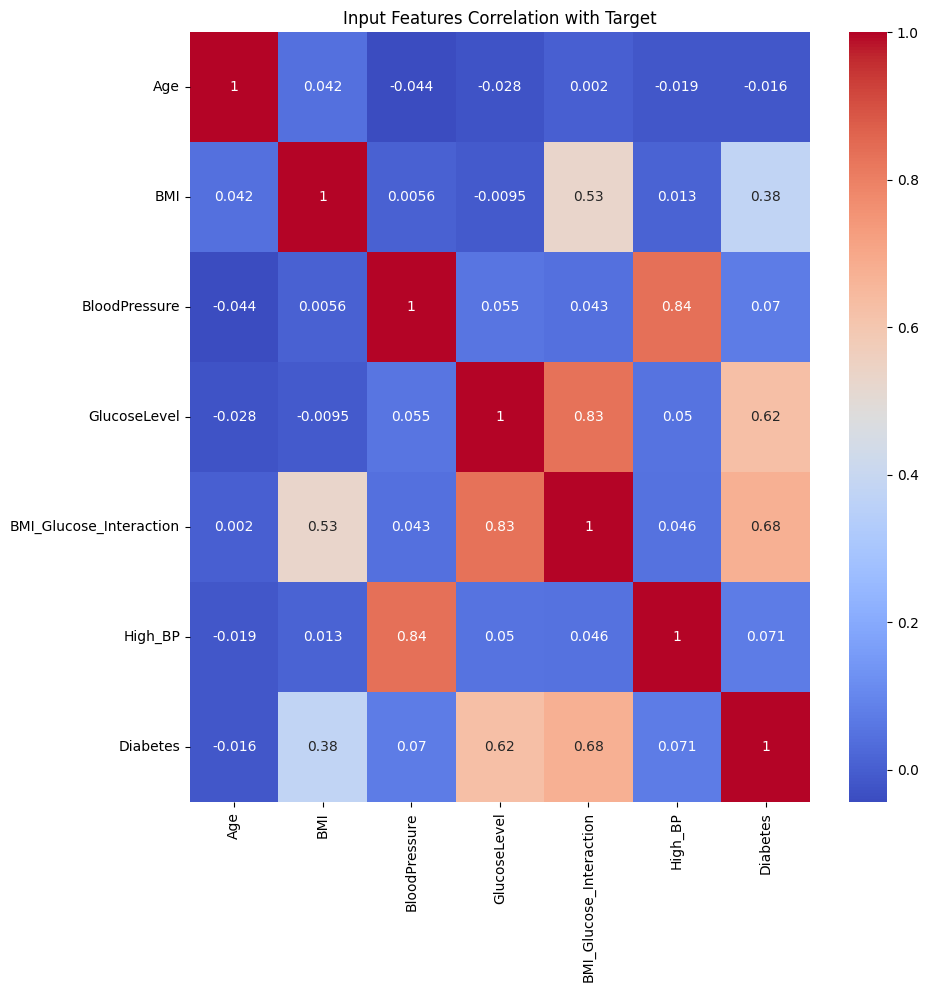

In [ ]:
#draw corr with target
plt.figure(figsize=(10, 10)) 
plt.title("Input Features Correlation with Target")
sns.heatmap( 
    df[NUMERICAL_FEATURES + [TARGET]].corr(),
    annot=True,
    cmap='coolwarm',
    )

In [ ]:
INPUT_FEATURES

['Age',
 'Gender',
 'BMI',
 'BloodPressure',
 'GlucoseLevel',
 'PhysicalActivity',
 'FamilyHistory',
 'BMI_Category',
 'BMI_Glucose_Interaction',
 'High_BP']

# Encoding & Scaling

In [ ]:
CATEGORICAL_FEATURES

['Gender', 'PhysicalActivity', 'FamilyHistory', 'BMI_Category']

In [ ]:
trainable_df = df.copy()

In [ ]:
trainable_df = pd.get_dummies(trainable_df, columns=CATEGORICAL_FEATURES, drop_first=True, dtype=int)

In [ ]:
min_max_scaller = MinMaxScaler()

min_max_scaller.fit(trainable_df[NUMERICAL_FEATURES]) #خليها من صفر لواحد

MinMaxScaler()

In [ ]:
trainable_df.loc[:,NUMERICAL_FEATURES] = min_max_scaller.transform(trainable_df[NUMERICAL_FEATURES])

In [ ]:
df.head()

Age  Gender   BMI  BloodPressure  GlucoseLevel PhysicalActivity  \
0  56.0  Female  30.5          109.0         192.0             High   
1  69.0    Male  26.3          118.0         188.0           Medium   
2  46.0  Female  26.6          110.0         187.0             High   
3  32.0    Male  25.6           81.0          90.0           Medium   
4  60.0    Male  28.5          157.0          95.0             High   

  FamilyHistory  Diabetes BMI_Category  BMI_Glucose_Interaction  High_BP  
0            No         1        Obese                   5856.0        0  
1           Yes         1   Overweight                   4944.4        0  
2           Yes         1   Overweight                   4974.2        0  
3           Yes         0   Overweight                   2304.0        0  
4            No         0   Overweight                   2707.5        1

In [ ]:
trainable_df.head()

Age       BMI  BloodPressure  GlucoseLevel  Diabetes  \
0  0.622951  0.613023       0.367089      0.945312         1   
1  0.836066  0.456744       0.481013      0.914062         1   
2  0.459016  0.467907       0.379747      0.906250         1   
3  0.229508  0.430698       0.012658      0.148438         0   
4  0.688525  0.538605       0.974684      0.187500         0   

   BMI_Glucose_Interaction  High_BP  Gender_Male  PhysicalActivity_Low  \
0                 0.698030        0            0                     0   
1                 0.556485        0            1                     0   
2                 0.561113        0            0                     0   
3                 0.146509        0            1                     0   
4                 0.209161        1            1                     0   

   PhysicalActivity_Medium  FamilyHistory_Yes  BMI_Category_Normal  \
0                        0                  0                    0   
1                        1                  1                    0   
2                        0                  1                    0   
3                        1                  1                    0   
4                        0                  0                    0   

   BMI_Category_Overweight  BMI_Category_Obese  
0                        0                   1  
1                        1                   0  
2                        1                   0  
3                        1                   0  
4                        1                   0

In [ ]:
list(trainable_df.columns)

['Age',
 'BMI',
 'BloodPressure',
 'GlucoseLevel',
 'Diabetes',
 'BMI_Glucose_Interaction',
 'High_BP',
 'Gender_Male',
 'PhysicalActivity_Low',
 'PhysicalActivity_Medium',
 'FamilyHistory_Yes',
 'BMI_Category_Normal',
 'BMI_Category_Overweight',
 'BMI_Category_Obese']

# Dataset Splitting

In [ ]:
X_train,X_test, y_train, y_test = train_test_split( 
    trainable_df.drop(TARGET, axis=1), #X
    trainable_df.loc[:, TARGET],#Y
    test_size=0.25,
    random_state=1234,
    stratify=trainable_df.loc[:, TARGET],#Y
  )

In [ ]:
print(f"{X_train.shape= }")
print(f"{y_train.shape= }")
print(f"{X_test.shape= }")
print(f"{y_test.shape= }")

X_train.shape= (375, 13)
y_train.shape= (375,)
X_test.shape= (125, 13)
y_test.shape= (125,)


In [ ]:
y_train.value_counts()

Diabetes
1    226
0    149
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

Diabetes
1    75
0    50
Name: count, dtype: int64

In [ ]:
list(X_train.columns)

['Age',
 'BMI',
 'BloodPressure',
 'GlucoseLevel',
 'BMI_Glucose_Interaction',
 'High_BP',
 'Gender_Male',
 'PhysicalActivity_Low',
 'PhysicalActivity_Medium',
 'FamilyHistory_Yes',
 'BMI_Category_Normal',
 'BMI_Category_Overweight',
 'BMI_Category_Obese']

# Class Weights

In [ ]:
weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

class_weights = dict(zip(np.unique(y_train), weights))

print(class_weights)

{np.int64(0): np.float64(1.2583892617449663), np.int64(1): np.float64(0.8296460176991151)}


# Model Definition & Training

In [ ]:

models_list = [
    ("Logistic Regression", LogisticRegression(class_weight=class_weights)),

    ("SVC linear kernel", SVC(kernel='linear', class_weight=class_weights)),
    ("SVC poly kernel", SVC(kernel='poly', class_weight=class_weights)),
    ("SVC rbf kernel", SVC(kernel='rbf', class_weight=class_weights)),
    ("SVC sigmoid kernel", SVC(kernel='sigmoid', class_weight=class_weights)),

    ("Decision Tree max-depth=4", DecisionTreeClassifier(max_depth=4, class_weight=class_weights)),
    ("Decision Tree max-depth=5", DecisionTreeClassifier(max_depth=5, class_weight=class_weights)),
    ("Decision Tree max-depth=6", DecisionTreeClassifier(max_depth=6, class_weight=class_weights)),
    ("Decision Tree max-depth=7", DecisionTreeClassifier(max_depth=7, class_weight=class_weights)),

    ("Random Forest, trees=3", RandomForestClassifier(n_estimators=3, class_weight=class_weights)),
    ("Random Forest, trees=4", RandomForestClassifier(n_estimators=4, class_weight=class_weights)),
    ("Random Forest, trees=5", RandomForestClassifier(n_estimators=5, class_weight=class_weights)),
]


In [ ]:
for i, (name, model) in enumerate(models_list):
    print(f'{i+1:3d}/{len(models_list)}. Train {name}')
    model.fit(X_train, y_train)


  1/12. Train Logistic Regression
  2/12. Train SVC linear kernel
  3/12. Train SVC poly kernel
  4/12. Train SVC rbf kernel
  5/12. Train SVC sigmoid kernel
  6/12. Train Decision Tree max-depth=4
  7/12. Train Decision Tree max-depth=5
  8/12. Train Decision Tree max-depth=6
  9/12. Train Decision Tree max-depth=7
 10/12. Train Random Forest, trees=3
 11/12. Train Random Forest, trees=4
 12/12. Train Random Forest, trees=5


# Model Prediction & Evaluation

Evaluation

In [ ]:
evaluation_dataset = []

for i, (name, model) in enumerate(models_list):
    print(f'{i+1:02d}/{len(models_list)}. Evaluate {model}')
    y_train_hat = model.predict(X_train)
    y_test_hat = model.predict(X_test)

    accuracy_score_train = accuracy_score( y_train, y_train_hat )
    accuracy_score_test = accuracy_score( y_test, y_test_hat )

    recall_score_train = recall_score( y_train, y_train_hat )
    recall_score_test = recall_score( y_test, y_test_hat )

    precision_score_train = precision_score( y_train, y_train_hat )
    precision_score_test = precision_score( y_test, y_test_hat )

    f1_score_train = f1_score( y_train, y_train_hat )
    f1_score_test = f1_score( y_test, y_test_hat)

    roc_auc_score_train = roc_auc_score( y_train, y_train_hat )
    roc_auc_score_test = roc_auc_score( y_test, y_test_hat)


    evaluation_dataset.append({
        "model": name, 'accuracy_score': accuracy_score_train, 
        'recall_score': recall_score_train, 'f1_score':f1_score_train, 
        'roc_auc_score':roc_auc_score_train, 'precision_score':precision_score_train,
        'data':'train'}
    )

    evaluation_dataset.append({
        "model": model, 'accuracy_score': accuracy_score_test, 
        'recall_score': recall_score_test, 'f1_score':f1_score_test, 
        'roc_auc_score':roc_auc_score_test, 'precision_score':precision_score_test,
        'data':'test'}
    )




evaluation_dataset = pd.DataFrame(evaluation_dataset)

01/12. Evaluate LogisticRegression(class_weight={np.int64(0): np.float64(1.2583892617449663),
                                 np.int64(1): np.float64(0.8296460176991151)})
02/12. Evaluate SVC(class_weight={np.int64(0): np.float64(1.2583892617449663),
                  np.int64(1): np.float64(0.8296460176991151)},
    kernel='linear')
03/12. Evaluate SVC(class_weight={np.int64(0): np.float64(1.2583892617449663),
                  np.int64(1): np.float64(0.8296460176991151)},
    kernel='poly')
04/12. Evaluate SVC(class_weight={np.int64(0): np.float64(1.2583892617449663),
                  np.int64(1): np.float64(0.8296460176991151)})
05/12. Evaluate SVC(class_weight={np.int64(0): np.float64(1.2583892617449663),
                  np.int64(1): np.float64(0.8296460176991151)},
    kernel='sigmoid')
06/12. Evaluate DecisionTreeClassifier(class_weight={np.int64(0): np.float64(1.2583892617449663),
                                     np.int64(1): np.float64(0.8296460176991151)},
            

In [ ]:
evaluation_dataset.sort_values('f1_score', ascending=False)

model  accuracy_score  \
22                             Random Forest, trees=5        0.997333   
20                             Random Forest, trees=4        0.997333   
16                          Decision Tree max-depth=7        0.994667   
12                          Decision Tree max-depth=5        0.992000   
14                          Decision Tree max-depth=6        0.992000   
10                          Decision Tree max-depth=4        0.989333   
18                             Random Forest, trees=3        0.984000   
4                                     SVC poly kernel        0.970667   
11  DecisionTreeClassifier(class_weight={np.int64(...        0.968000   
23  (DecisionTreeClassifier(max_features='sqrt', r...        0.968000   
15  DecisionTreeClassifier(class_weight={np.int64(...        0.968000   
6                                      SVC rbf kernel        0.965333   
13  DecisionTreeClassifier(class_weight={np.int64(...        0.960000   
17  DecisionTreeClassifier(class_weight={np.int64(...        0.960000   
2                                   SVC linear kernel        0.952000   
0                                 Logistic Regression        0.952000   
21  (DecisionTreeClassifier(max_features='sqrt', r...        0.952000   
3   SVC(class_weight={np.int64(0): np.float64(1.25...        0.944000   
1   LogisticRegression(class_weight={np.int64(0): ...        0.944000   
19  (DecisionTreeClassifier(max_features='sqrt', r...        0.936000   
7   SVC(class_weight={np.int64(0): np.float64(1.25...        0.928000   
5   SVC(class_weight={np.int64(0): np.float64(1.25...        0.920000   
9   SVC(class_weight={np.int64(0): np.float64(1.25...        0.744000   
8                                  SVC sigmoid kernel        0.658667   

    recall_score  f1_score  roc_auc_score  precision_score   data  
22      0.995575  0.997783       0.997788         1.000000  train  
20      0.995575  0.997783       0.997788         1.000000  train  
16      1.000000  0.995595       0.993289         0.991228  train  
12      1.000000  0.993407       0.989933         0.986900  train  
14      0.995575  0.993377       0.991076         0.991189  train  
10      1.000000  0.991228       0.986577         0.982609  train  
18      0.982301  0.986667       0.984439         0.991071  train  
4       0.969027  0.975501       0.971090         0.982063  train  
11      0.986667  0.973684       0.963333         0.961039   test  
23      0.973333  0.973333       0.966667         0.973333   test  
15      0.960000  0.972973       0.970000         0.986301   test  
6       0.960177  0.970917       0.966666         0.981900  train  
13      0.960000  0.966443       0.960000         0.972973   test  
17      0.960000  0.966443       0.960000         0.972973   test  
2       0.929204  0.958904       0.957890         0.990566  train  
0       0.929204  0.958904       0.957890         0.990566  train  
21      0.933333  0.958904       0.956667         0.985915   test  
3       0.920000  0.951724       0.950000         0.985714   test  
1       0.920000  0.951724       0.950000         0.985714   test  
19      0.946667  0.946667       0.933333         0.946667   test  
7       0.906667  0.937931       0.933333         0.971429   test  
5       0.893333  0.930556       0.926667         0.971014   test  
9       0.746667  0.777778       0.743333         0.811594   test  
8       0.663717  0.700935       0.657362         0.742574  train

In [ ]:
print("Best Model in F1 Score test")
evaluation_dataset[evaluation_dataset['data']=='test'].sort_values('f1_score',ascending=False).iloc[0,:]

Best Model in F1 Score test


model              DecisionTreeClassifier(class_weight={np.int64(...
accuracy_score                                                 0.968
recall_score                                                0.986667
f1_score                                                    0.973684
roc_auc_score                                               0.963333
precision_score                                             0.961039
data                                                            test
Name: 11, dtype: object

In [ ]:
print("Best Model in ROC-AUC test")
evaluation_dataset[evaluation_dataset['data']=='test'].sort_values('roc_auc_score',ascending=False).iloc[0,:]

Best Model in ROC-AUC test


model              DecisionTreeClassifier(class_weight={np.int64(...
accuracy_score                                                 0.968
recall_score                                                    0.96
f1_score                                                    0.972973
roc_auc_score                                                   0.97
precision_score                                             0.986301
data                                                            test
Name: 15, dtype: object

C:\Users\first\AppData\Local\Temp\ipykernel_4680\3526567459.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


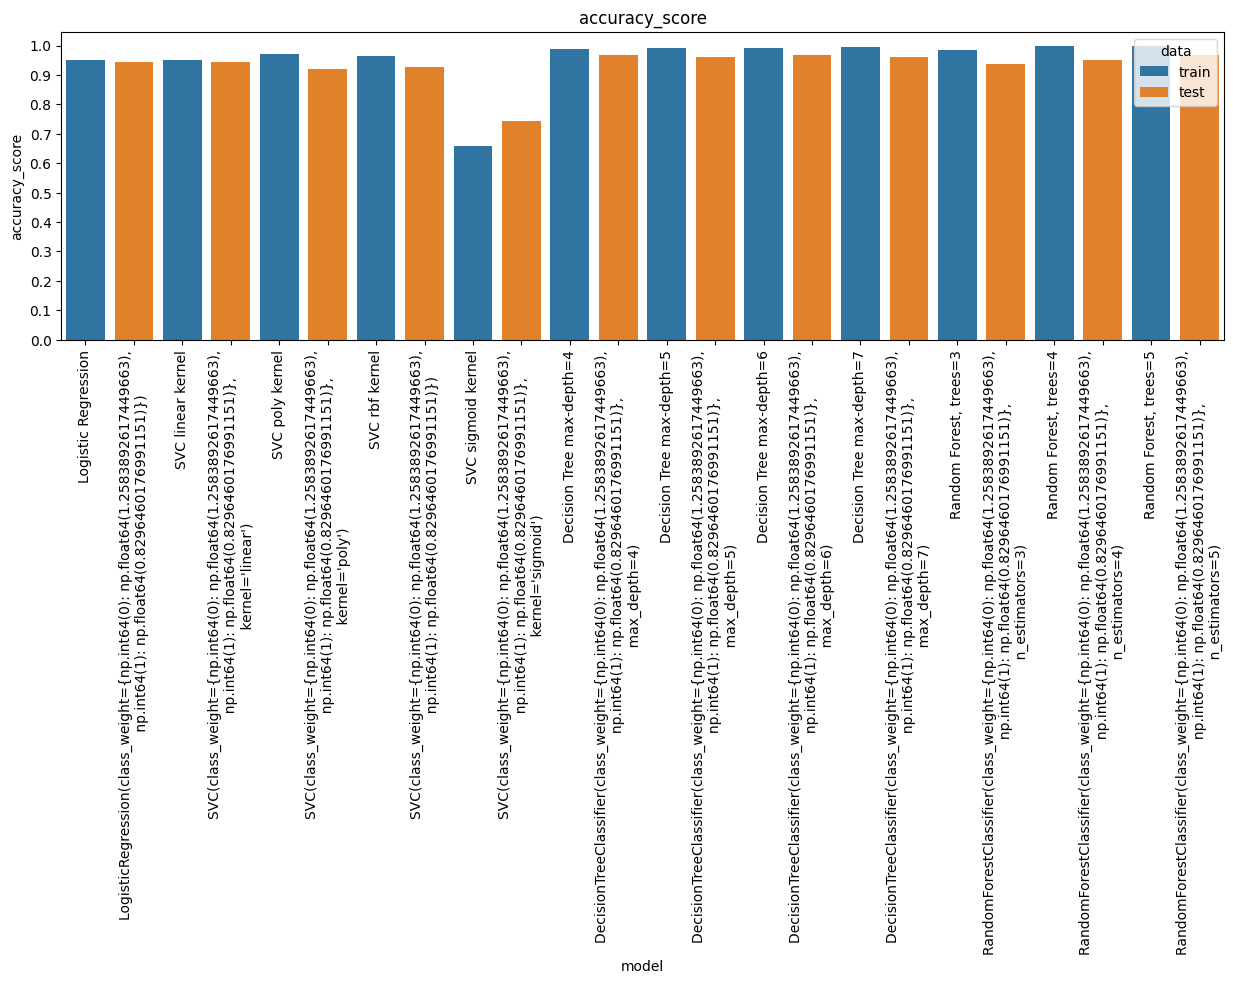

C:\Users\first\AppData\Local\Temp\ipykernel_4680\3526567459.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


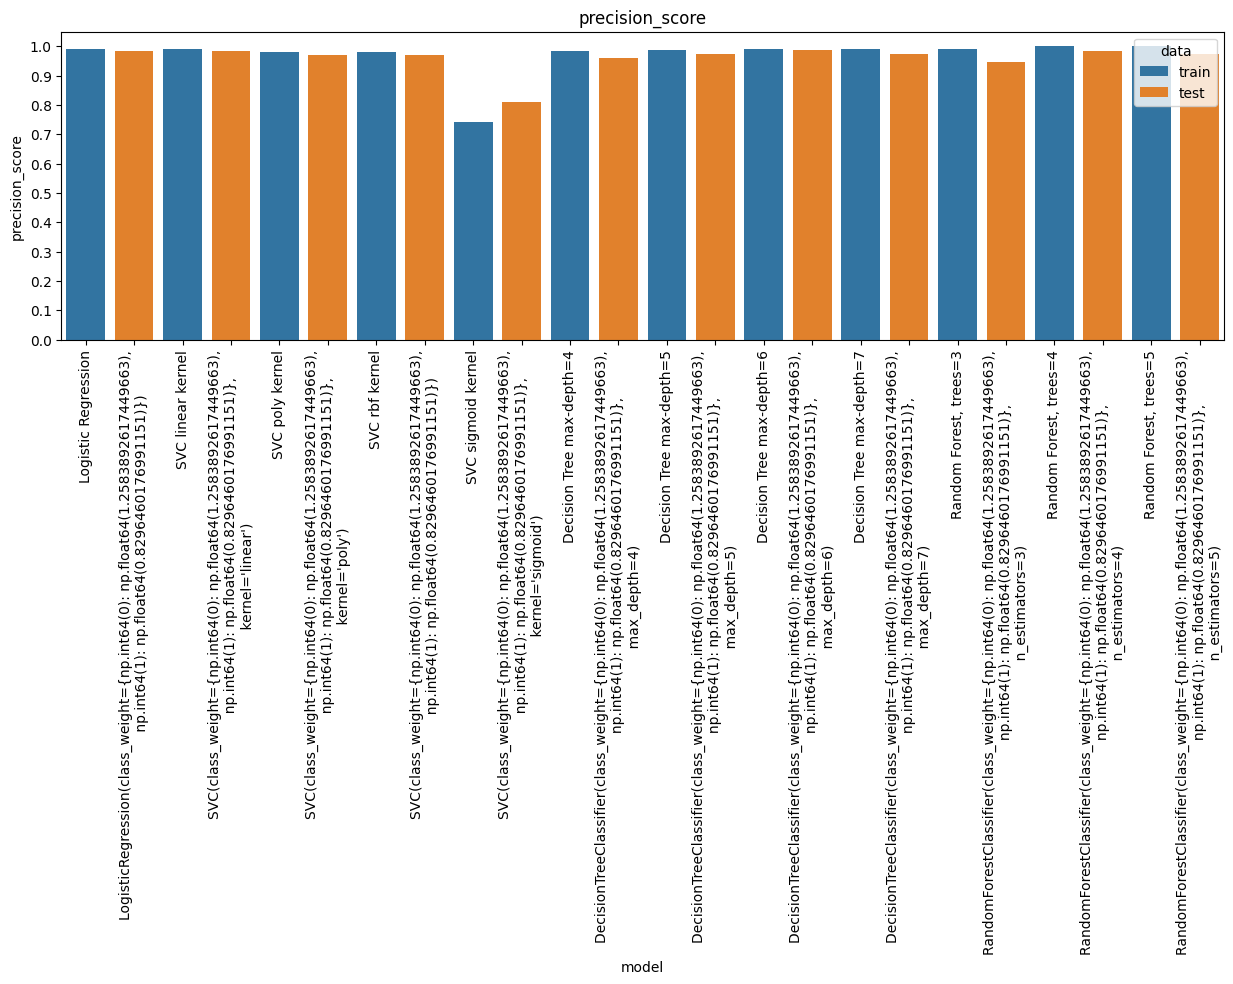

C:\Users\first\AppData\Local\Temp\ipykernel_4680\3526567459.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


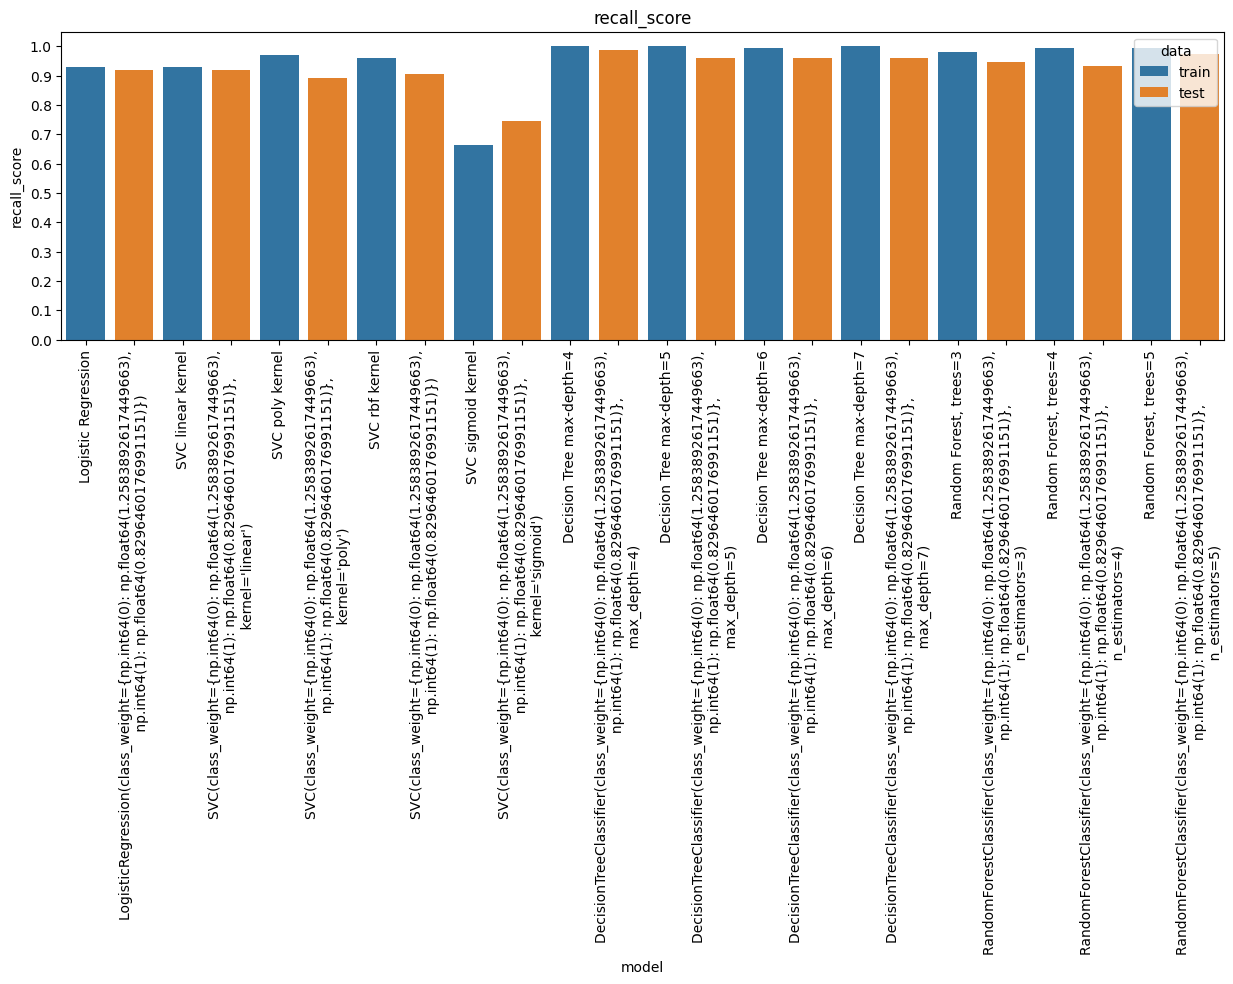

C:\Users\first\AppData\Local\Temp\ipykernel_4680\3526567459.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


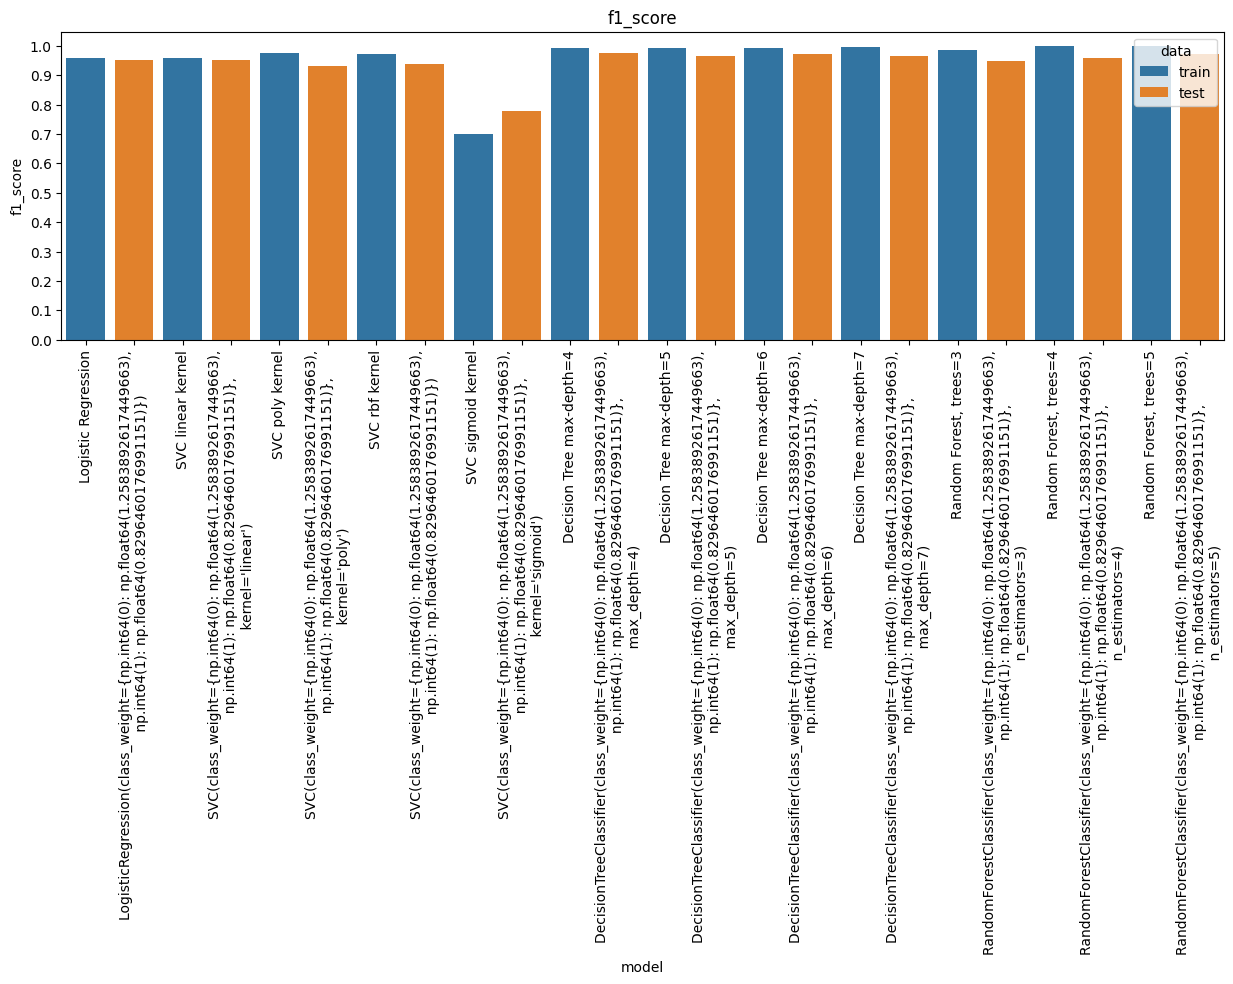

C:\Users\first\AppData\Local\Temp\ipykernel_4680\3526567459.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


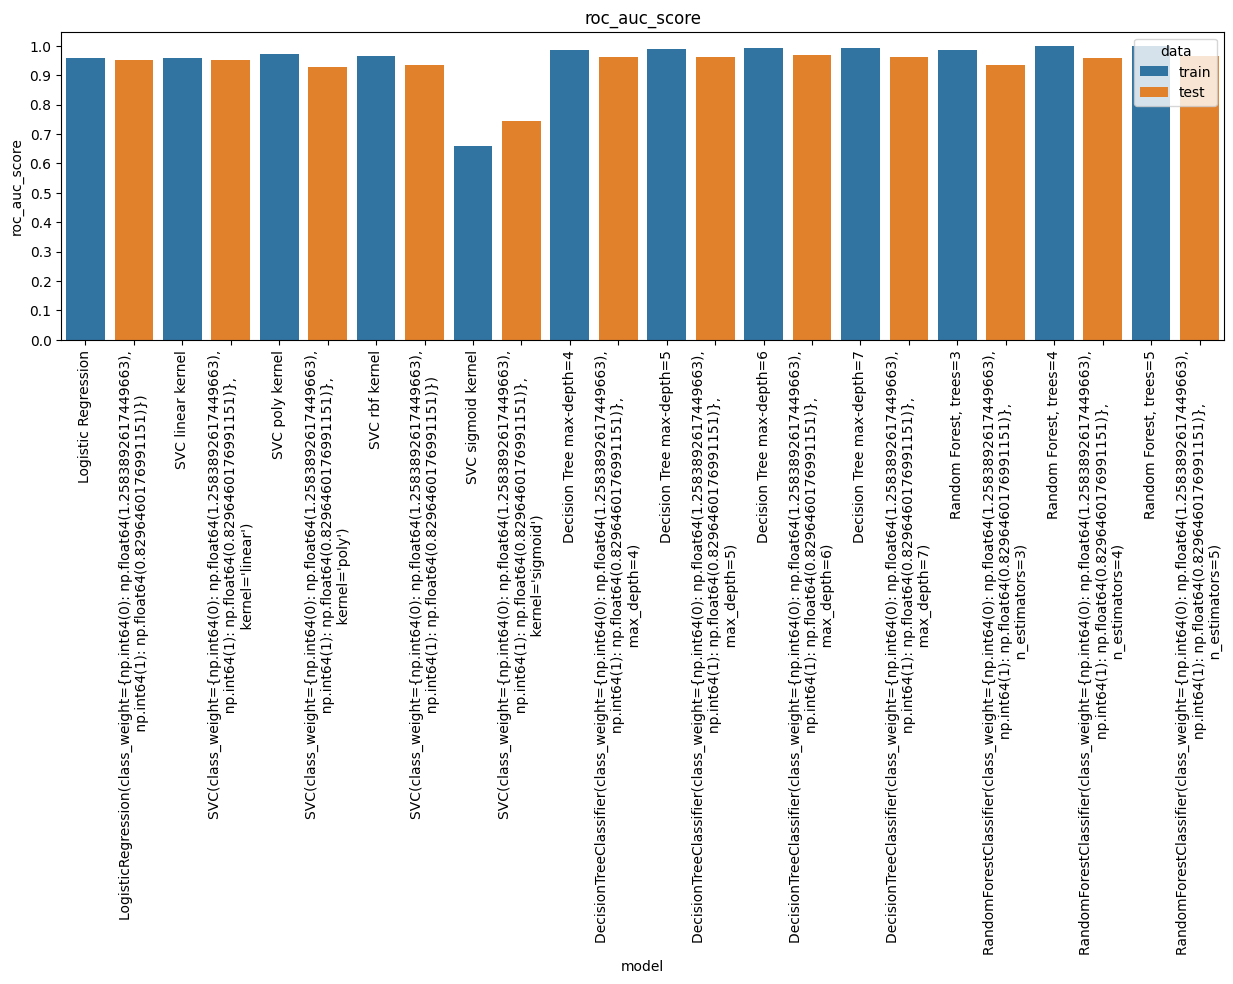

In [ ]:
evaluation_dataset['model'] = evaluation_dataset['model'].astype(str)
metrics_to_plot = ['accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'roc_auc_score']

for metric in metrics_to_plot:
    plt.figure(figsize=(15,4))
    plt.title(f"{metric}")
    sns.barplot(evaluation_dataset, x='model', y=metric, hue='data')
    plt.xticks(rotation=90)
    plt.yticks(np.linspace(0,1,11))
    plt.tight_layout()
    plt.show()



# Model Exploration

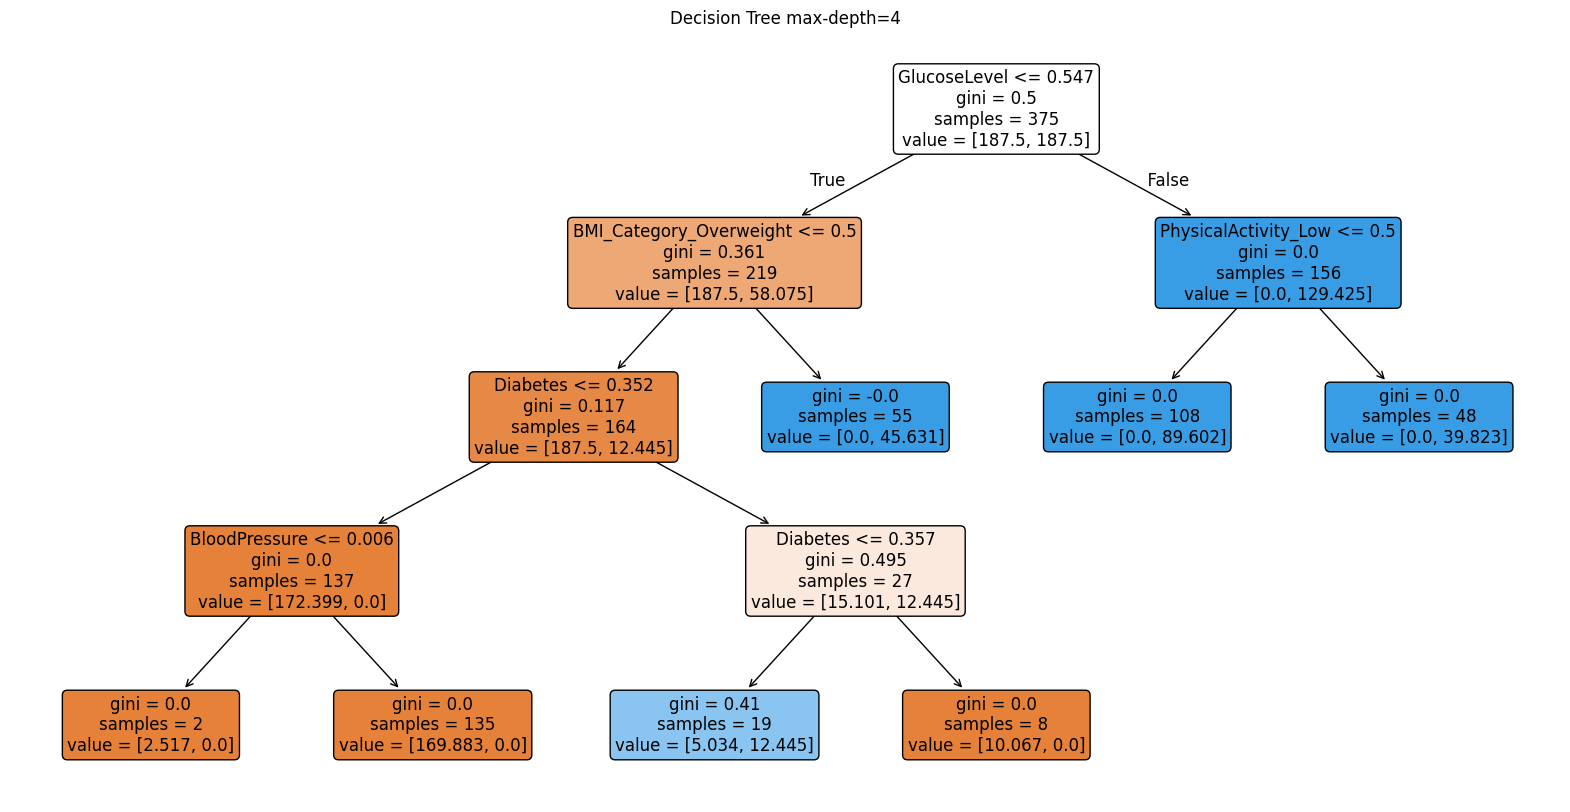

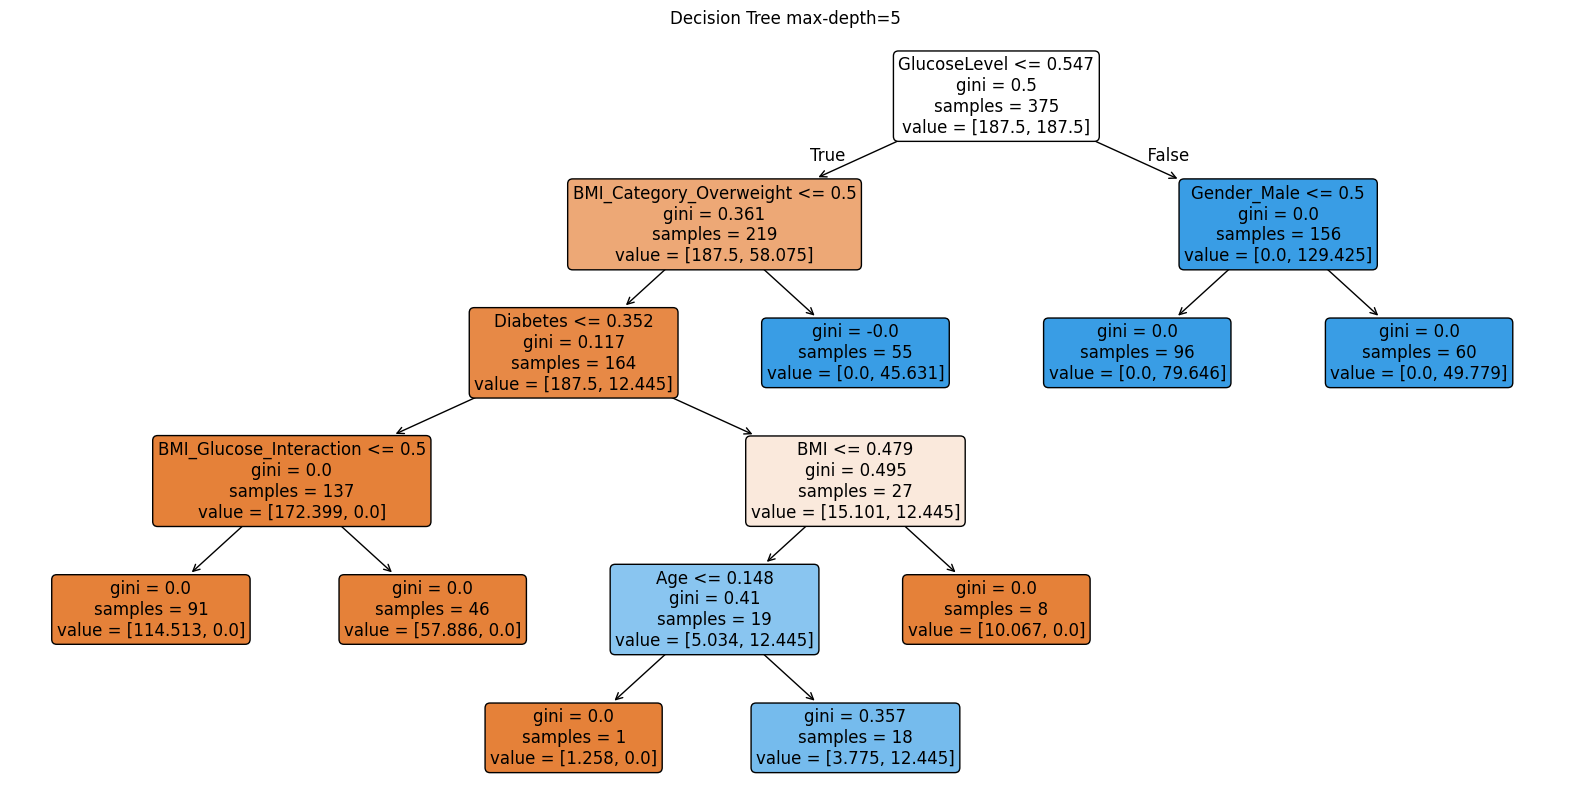

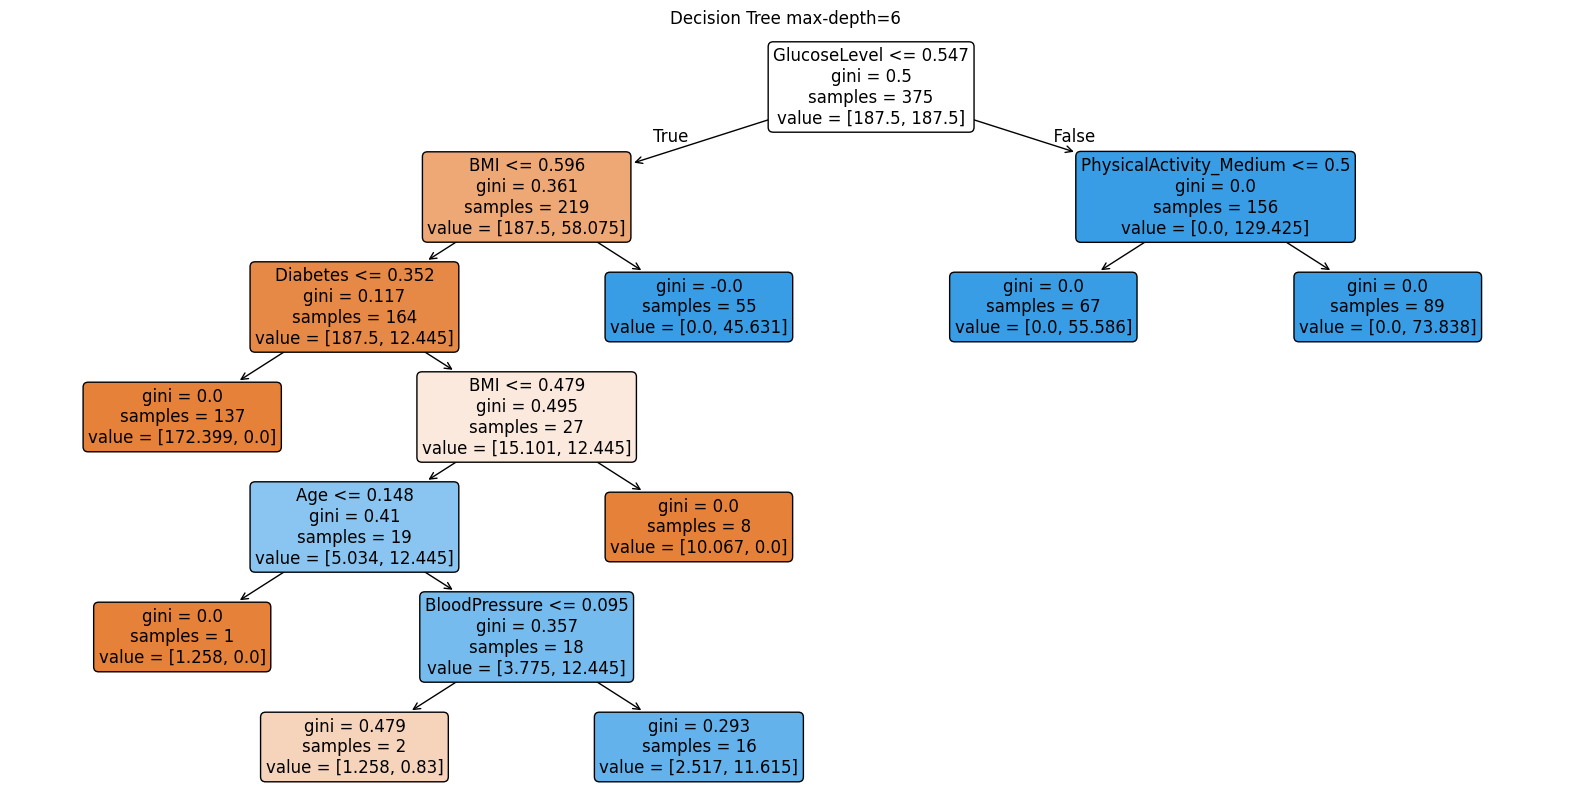

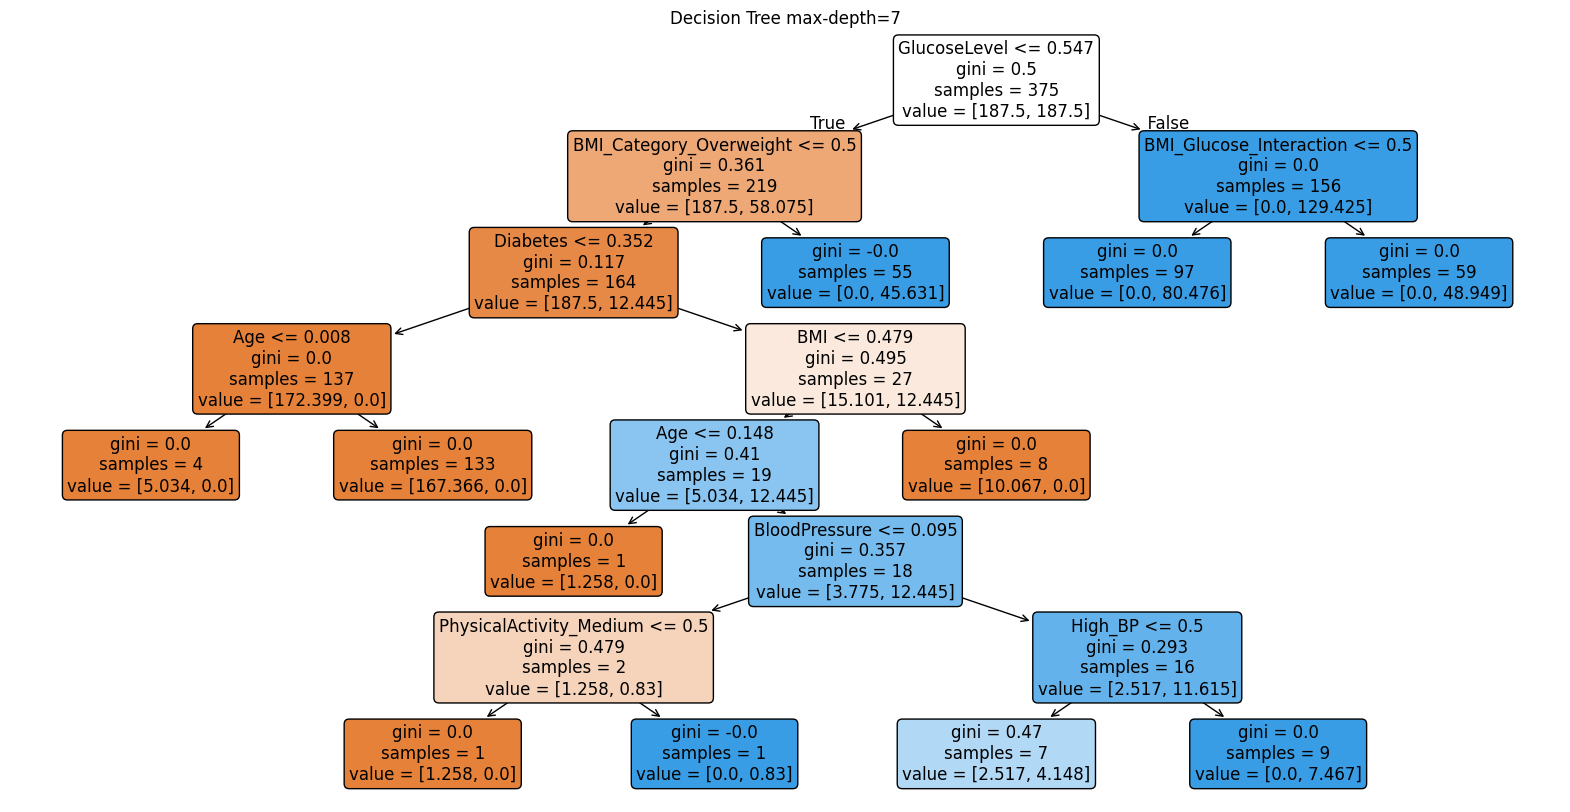

In [ ]:
for name,model in models_list:
    if isinstance(model, DecisionTreeClassifier):

        plt.figure(figsize=(20, 10))
        
        plot_tree(model, 
                feature_names=trainable_df.columns, 
                filled=True, 
                rounded=True, 
                fontsize=12)
                
        plt.title(name)
        plt.show()
        

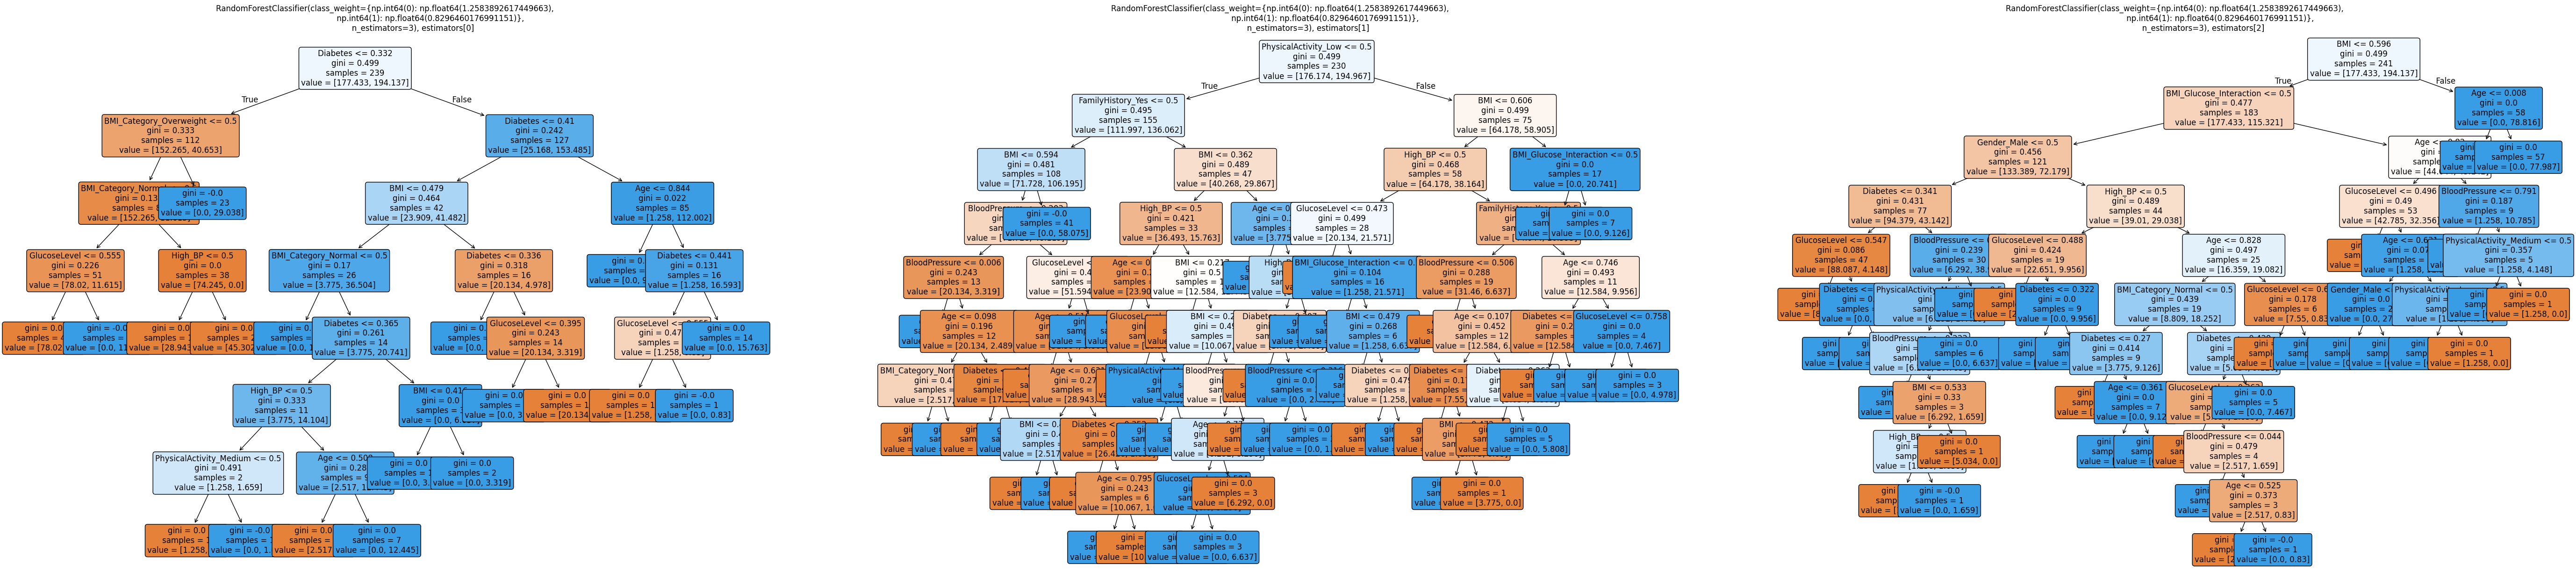

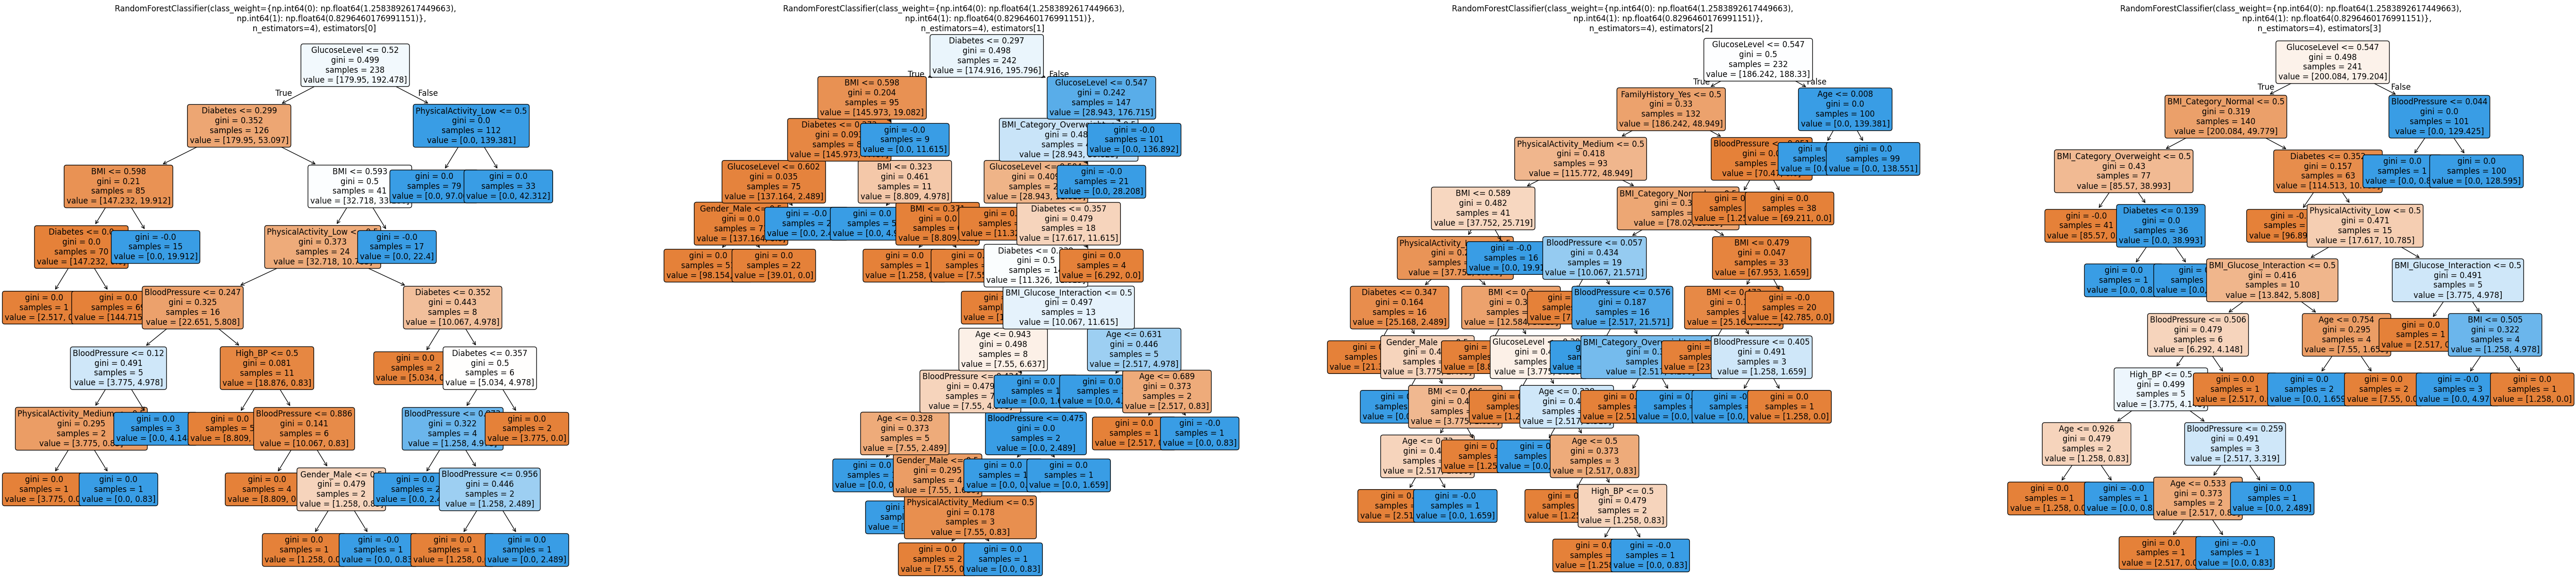

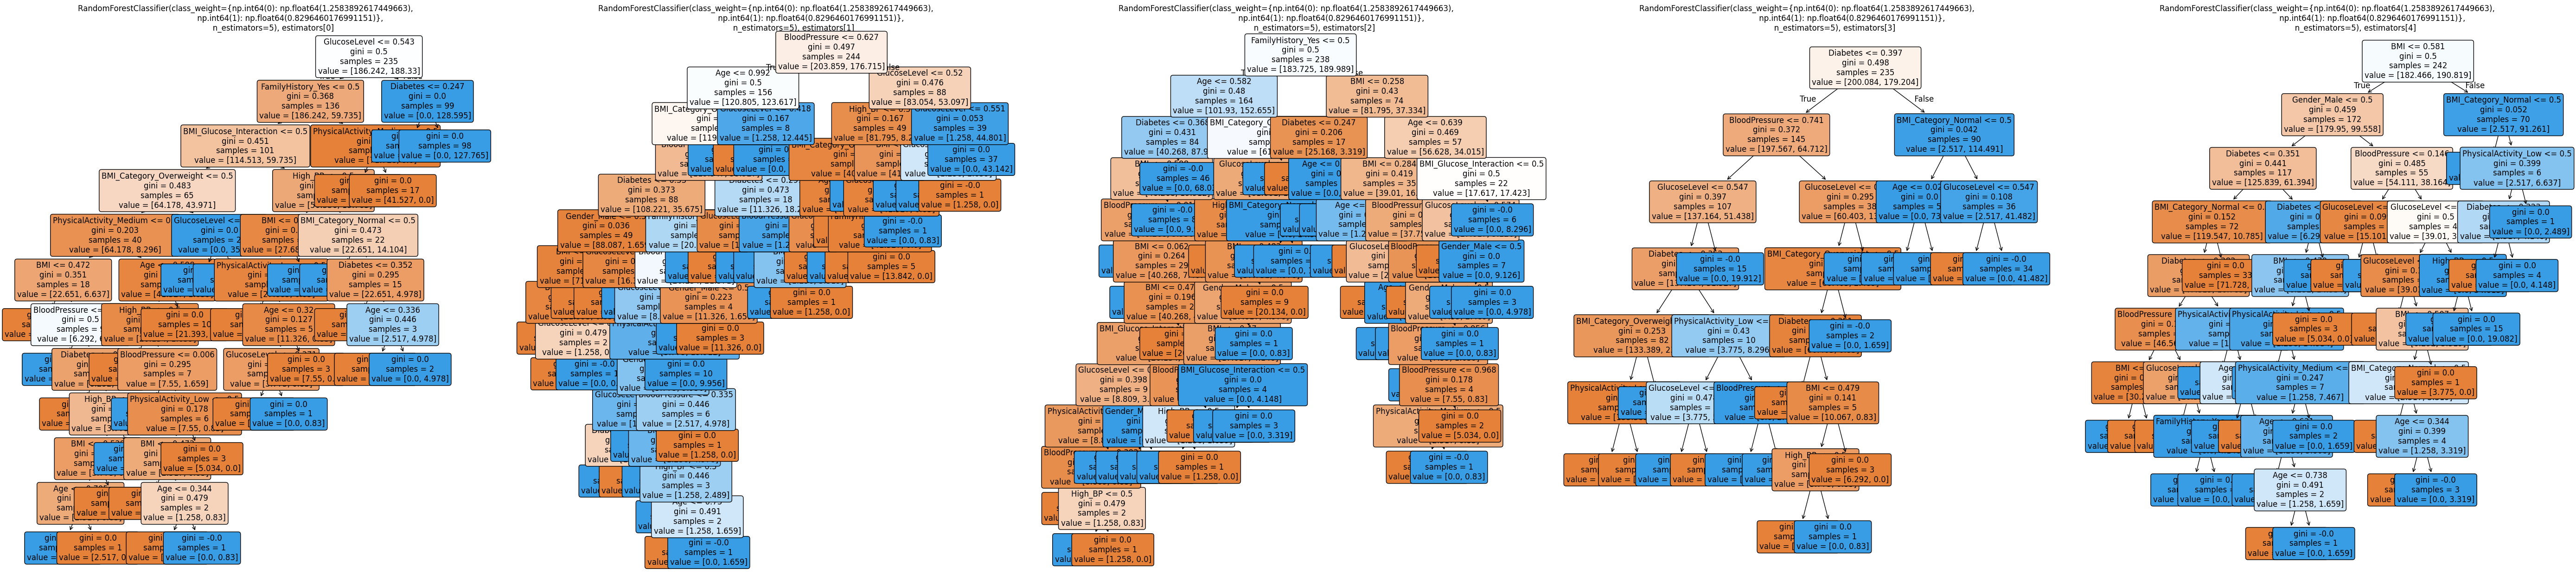

In [ ]:
for name,model in models_list:
    if isinstance(model, RandomForestClassifier):

        plt.figure(figsize=(70, 15))

        for i, estimator in enumerate(model.estimators_):
            plt.subplot(1, len(model.estimators_), i+1)

            plot_tree(estimator, 
                    feature_names=trainable_df.columns, 
                    filled=True, 
                    rounded=True, 
                    fontsize=12)
            
            plt.title(f"{model}, estimators[{i}]")
        
        plt.show()

In [1]:
#save everything for making steamlit 
import pickle
best_model = evaluation_dataset[evaluation_dataset['data']=='test'] \
                .sort_values('f1_score', ascending=False).iloc[0,:]['model']

# Save the best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(min_max_scaller, f)

print("Best model and scaler saved successfully!")


NameError: name 'evaluation_dataset' is not defined

<p style="text-align:center"><img src="https://media.tenor.com/NUGNhk0Eh64AAAAi/thank-you-thanks.gif"></p>
<br><br>
<p style="text-align:center; font-weight:600; font-size:18px"><em>Thankyou! For viewing this Notebook, Please feel free to provide any feedback!… </em>😄<br>
<img src="https://i.imgur.com/ugj24t1.png" style="width:30%">
</p>

<br><br>
